In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("FinalMerge.csv",encoding="latin1")

In [3]:
df.isnull().sum()

Unnamed: 0       0
imdb_id          0
X.x              0
Actors           1
Country          0
Director         1
Genre            1
IMDB.Rating      1
IMDB.Votes       1
Language         2
Production     157
Rated          198
Released         0
Runtime          6
Title            0
Year             0
X.y              0
budget           0
revenue          0
dtype: int64

In [4]:
df_1 = df.drop(["Unnamed: 0","imdb_id","X.x","X.y"],axis=1)

In [5]:
numerical_feature = []
categorical_feature = []
for i in df_1.columns:
    if (df_1[i]).dtype == "int64" or (df_1[i]).dtype == "float64":
        numerical_feature.append(i)
    else:
        categorical_feature.append(i)

In [6]:
print(numerical_feature)
print(len(numerical_feature))
print("-------------------------------------------------")
print(categorical_feature)
print(len(categorical_feature))

['IMDB.Rating', 'Year', 'budget', 'revenue']
4
-------------------------------------------------
['Actors', 'Country', 'Director', 'Genre', 'IMDB.Votes', 'Language', 'Production', 'Rated', 'Released', 'Runtime', 'Title']
11


## Feature Engineering


### Actors

In [14]:
df_1 = df_1.drop(df_1[df_1["Actors"].isnull()].index)

### Country

In [7]:
df_1["Country"] = df_1["Country"].map(lambda x: x.split(",")[0])

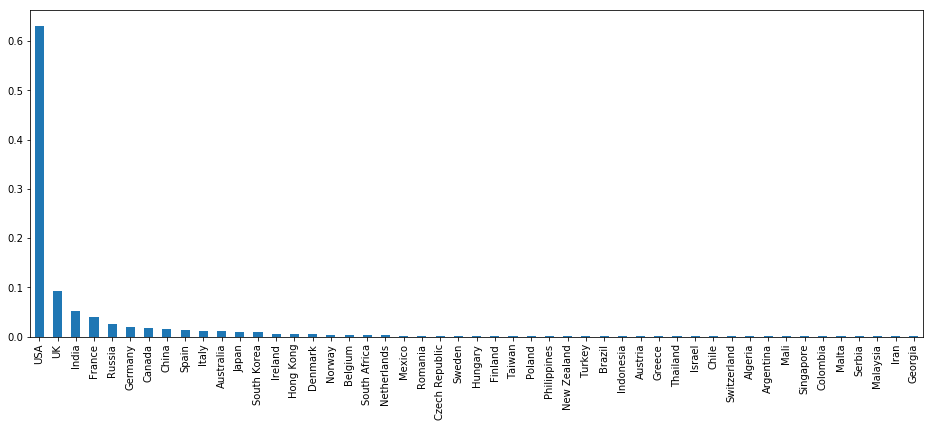

In [8]:
(df_1["Country"].value_counts()/df_1.shape[0]).plot.bar(figsize=(16,6))

### Director

In [15]:
df_1 = df_1.drop(df_1[df_1["Director"].isnull()].index)

### Genre

In [16]:
df_1 = df_1.drop(df_1[df_1["Genre"].isnull()].index)

### IMDB.Votes

In [17]:
df_1 = df_1.drop(df_1[df_1["IMDB.Votes"].isnull()].index)

### Language

In [19]:
# df['State'] = df.area.apply(lambda x: x.split(',')[1] if len(x.split(','))>1 else '')
df_1["Language"] = df_1["Language"].replace(np.nan,"None")
df_1["Language"].value_counts()

English                                                   1260
English, Spanish                                           108
English, French                                             60
Russian                                                     43
Hindi                                                       41
English, Ukrainian                                          29
English, Russian                                            25
English, German                                             23
English, Japanese                                           22
English, Italian                                            19
English, Arabic                                             18
French                                                      16
Spanish                                                     13
English, Mandarin                                           13
French, English                                             13
Hindi, English                                         

In [20]:
df_1 = df_1.drop(df_1[df_1["Language"].isnull()].index)

### Production

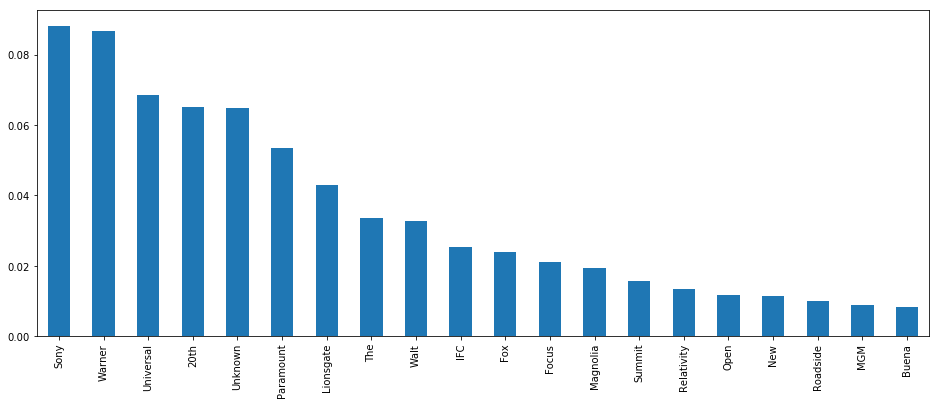

In [21]:
df_1["Production"] = df_1["Production"].replace(np.nan, "Unknown")\
                    .map(lambda x: x.split(" ")[0] if len(x) > 1 else x)
(df_1["Production"].value_counts()/df_1.shape[0])[:20].plot.bar(figsize=(16,6))
#df_1["Production"].map(lambda x: x.split(" ")[0])

In [22]:
# high cardinality: may use frequency encoding
df_1["Production"].nunique()

309

### Rated

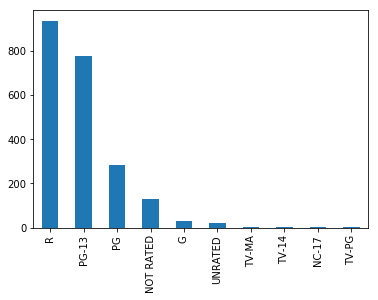

In [23]:
df_1["Rated"].value_counts().plot.bar()

In [24]:
df_1["Rated"] = df_1["Rated"].replace(np.nan, "UNRATED")\
            .replace("NOT RATED", "UNRATED")

### Released

In [ ]:
df_1["Released"]

### Runtime

In [25]:
df_1 = df_1.drop(df_1[df_1["Runtime"].isnull()].index)

In [26]:
df_1["Runtime"].isnull().sum()

0

In [27]:
df_1["Runtime"] = df_1["Runtime"].map(lambda x:int(x.strip("min")))

### Title

In [31]:
df_1.drop("Title", axis=1, inplace=True)

### IMDB.Rating

In [28]:
df_1 = df_1.drop(df_1["IMDB.Rating"].isnull().index)

In [29]:
df_1["IMDB.Rating"].isnull().sum()

0

### Year

In [ ]:
# may train 2006-2012 and test 2013-2016

### budget

### revenue

In [30]:
df_1.isnull().sum()

Actors         0.0
Country        0.0
Director       0.0
Genre          0.0
IMDB.Rating    0.0
IMDB.Votes     0.0
Language       0.0
Production     0.0
Rated          0.0
Released       0.0
Runtime        0.0
Title          0.0
Year           0.0
budget         0.0
revenue        0.0
dtype: float64